In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
csv_path = '/content/drive/MyDrive/sort_data/Slow-sorts/Insertion-Merge-sorts.csv'

In [5]:
df = pd.read_csv(csv_path, index_col='n\\f_sort')
df

Insertion sort  Merge sort
n\f_sort                            
19              0.000002    0.000005
101             0.000014    0.000025
151             0.000028    0.000039
227             0.000061    0.000061
307             0.000104    0.000082
509             0.000318    0.000147
2003            0.007505    0.000692
10007           0.111768    0.003928
20011           0.435676    0.008465
50021           3.160970    0.022365

In [6]:
# df[['Insertion sort', 'Merge sort']].head(4).plot(figsize=(15, 10), ylabel="seconds", xlabel="size of sorted array")
plt.figure(figsize=(20, 15))
plt.plot(df.head(6).index, df['Insertion sort'].head(6), label='Insertion sort')
plt.plot(df.head(6).index, df['Merge sort'].head(6), label='Merge sort')
plt.ylabel('seconds')
plt.xlabel('size of sorted array')
plt.legend()

In [7]:
df[['Insertion sort', 'Merge sort']].plot(figsize=(15, 5), ylabel="seconds", xlabel="size of sorted array")

<Axes: xlabel='size of sorted array', ylabel='seconds'>

In [8]:
data = [{'n\\f_sort': 100003, 'Insertion sort': 100003**2/(10**8), 'Merge sort': 100003*math.log(2, 100003)/(10**8)}]
# {'n\\f_sort': 1000003, 'Insertion sort': 1000003**2/(10**8), 'Merge sort': 1000003*math.log(2, 1000003)/(10**8)}
df12 = pd.DataFrame(data, columns=['n\\f_sort', 'Insertion sort', 'Merge sort']).set_index('n\\f_sort')
df13 = pd.concat([df, df12])
print(df13)
coef = np.polyfit(df13.index, df13['Insertion sort'], 2) #deg of 1 for straight line
f1 = np.polyval(coef, df13.tail(2).index);
plt.figure(figsize=(20, 15))
plt.plot(df13.tail(2).index, f1, label='Insertion sort trend line', color='magenta')
plt.plot(df13.index, df13['Insertion sort'], label='Insertion sort', color='blue')

slope2, intercept2 = np.polyfit(df13.index, df13['Merge sort'], 1) #deg of 1 for straight line
plt.plot(df13.index, slope2*df13.index + intercept2, label='Merge sort trend line', color='red')
plt.plot(df.index, df['Merge sort'], label='Merge sort', color='orange')
plt.ylabel('seconds')
plt.xlabel('size of sorted array')
plt.legend()

          Insertion sort  Merge sort
n\f_sort                            
19              0.000002    0.000005
101             0.000014    0.000025
151             0.000028    0.000039
227             0.000061    0.000061
307             0.000104    0.000082
509             0.000318    0.000147
2003            0.007505    0.000692
10007           0.111768    0.003928
20011           0.435676    0.008465
50021           3.160970    0.022365
100003        100.006000    0.000060


In [9]:
csv_path2 = '/content/drive/MyDrive/sort_data/Fast-sorts/Fast-sorts.csv'

In [10]:
df2 = pd.read_csv(csv_path2, index_col='n\\f_sort')
df2

Std qsort  My qsort  Heap sort  Merge sort  Worst case nlogn
n\f_sort                                                              
19         0.000002  0.000002   0.000003    0.000005          0.000012
101        0.000008  0.000008   0.000014    0.000026          0.000085
509        0.000066  0.000049   0.000077    0.000156          0.000544
2003       0.000337  0.000382   0.000458    0.000725          0.002732
10007      0.002545  0.002491   0.002837    0.004101          0.015859
20011      0.005574  0.005126   0.006154    0.008603          0.033052
50021      0.011757  0.013463   0.016847    0.023227          0.091809
100003     0.027130  0.029247   0.037452    0.047021          0.203154
1000003    0.272659  0.409925   0.579882    0.661286          2.522060

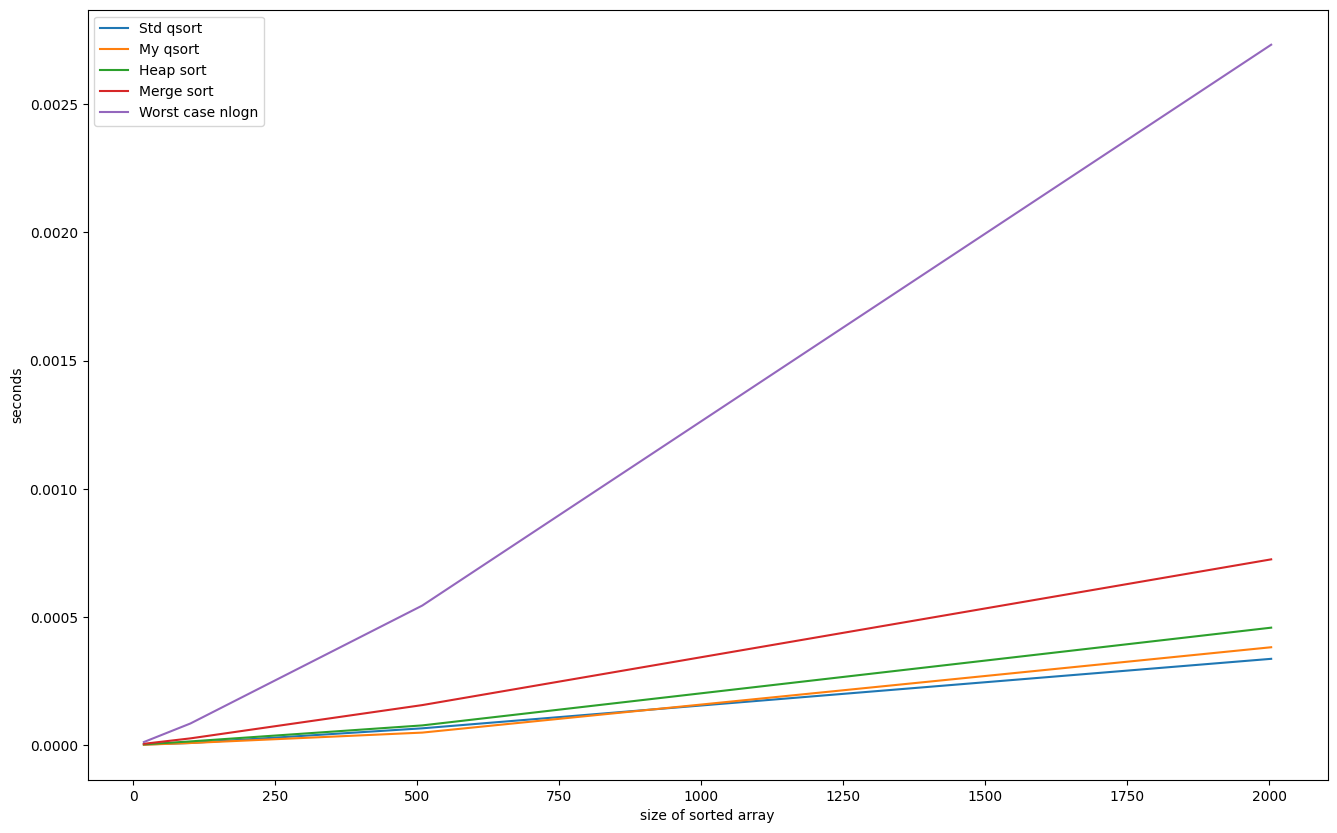

In [11]:
# df21 = df2.copy()
# for i in df2.columns:
#     df21[i] = 1000 * df21[i]

plt.figure(figsize=(16, 10))
plt.yscale('linear')
for i in df2.head(4).columns:
    plt.plot(df2.head(4).index, df2.head(4)[i], label=i)
plt.ylabel('seconds')
plt.xlabel('size of sorted array')
plt.legend()

20011 1000003


Text(0.5, 0, 'size of sorted array')

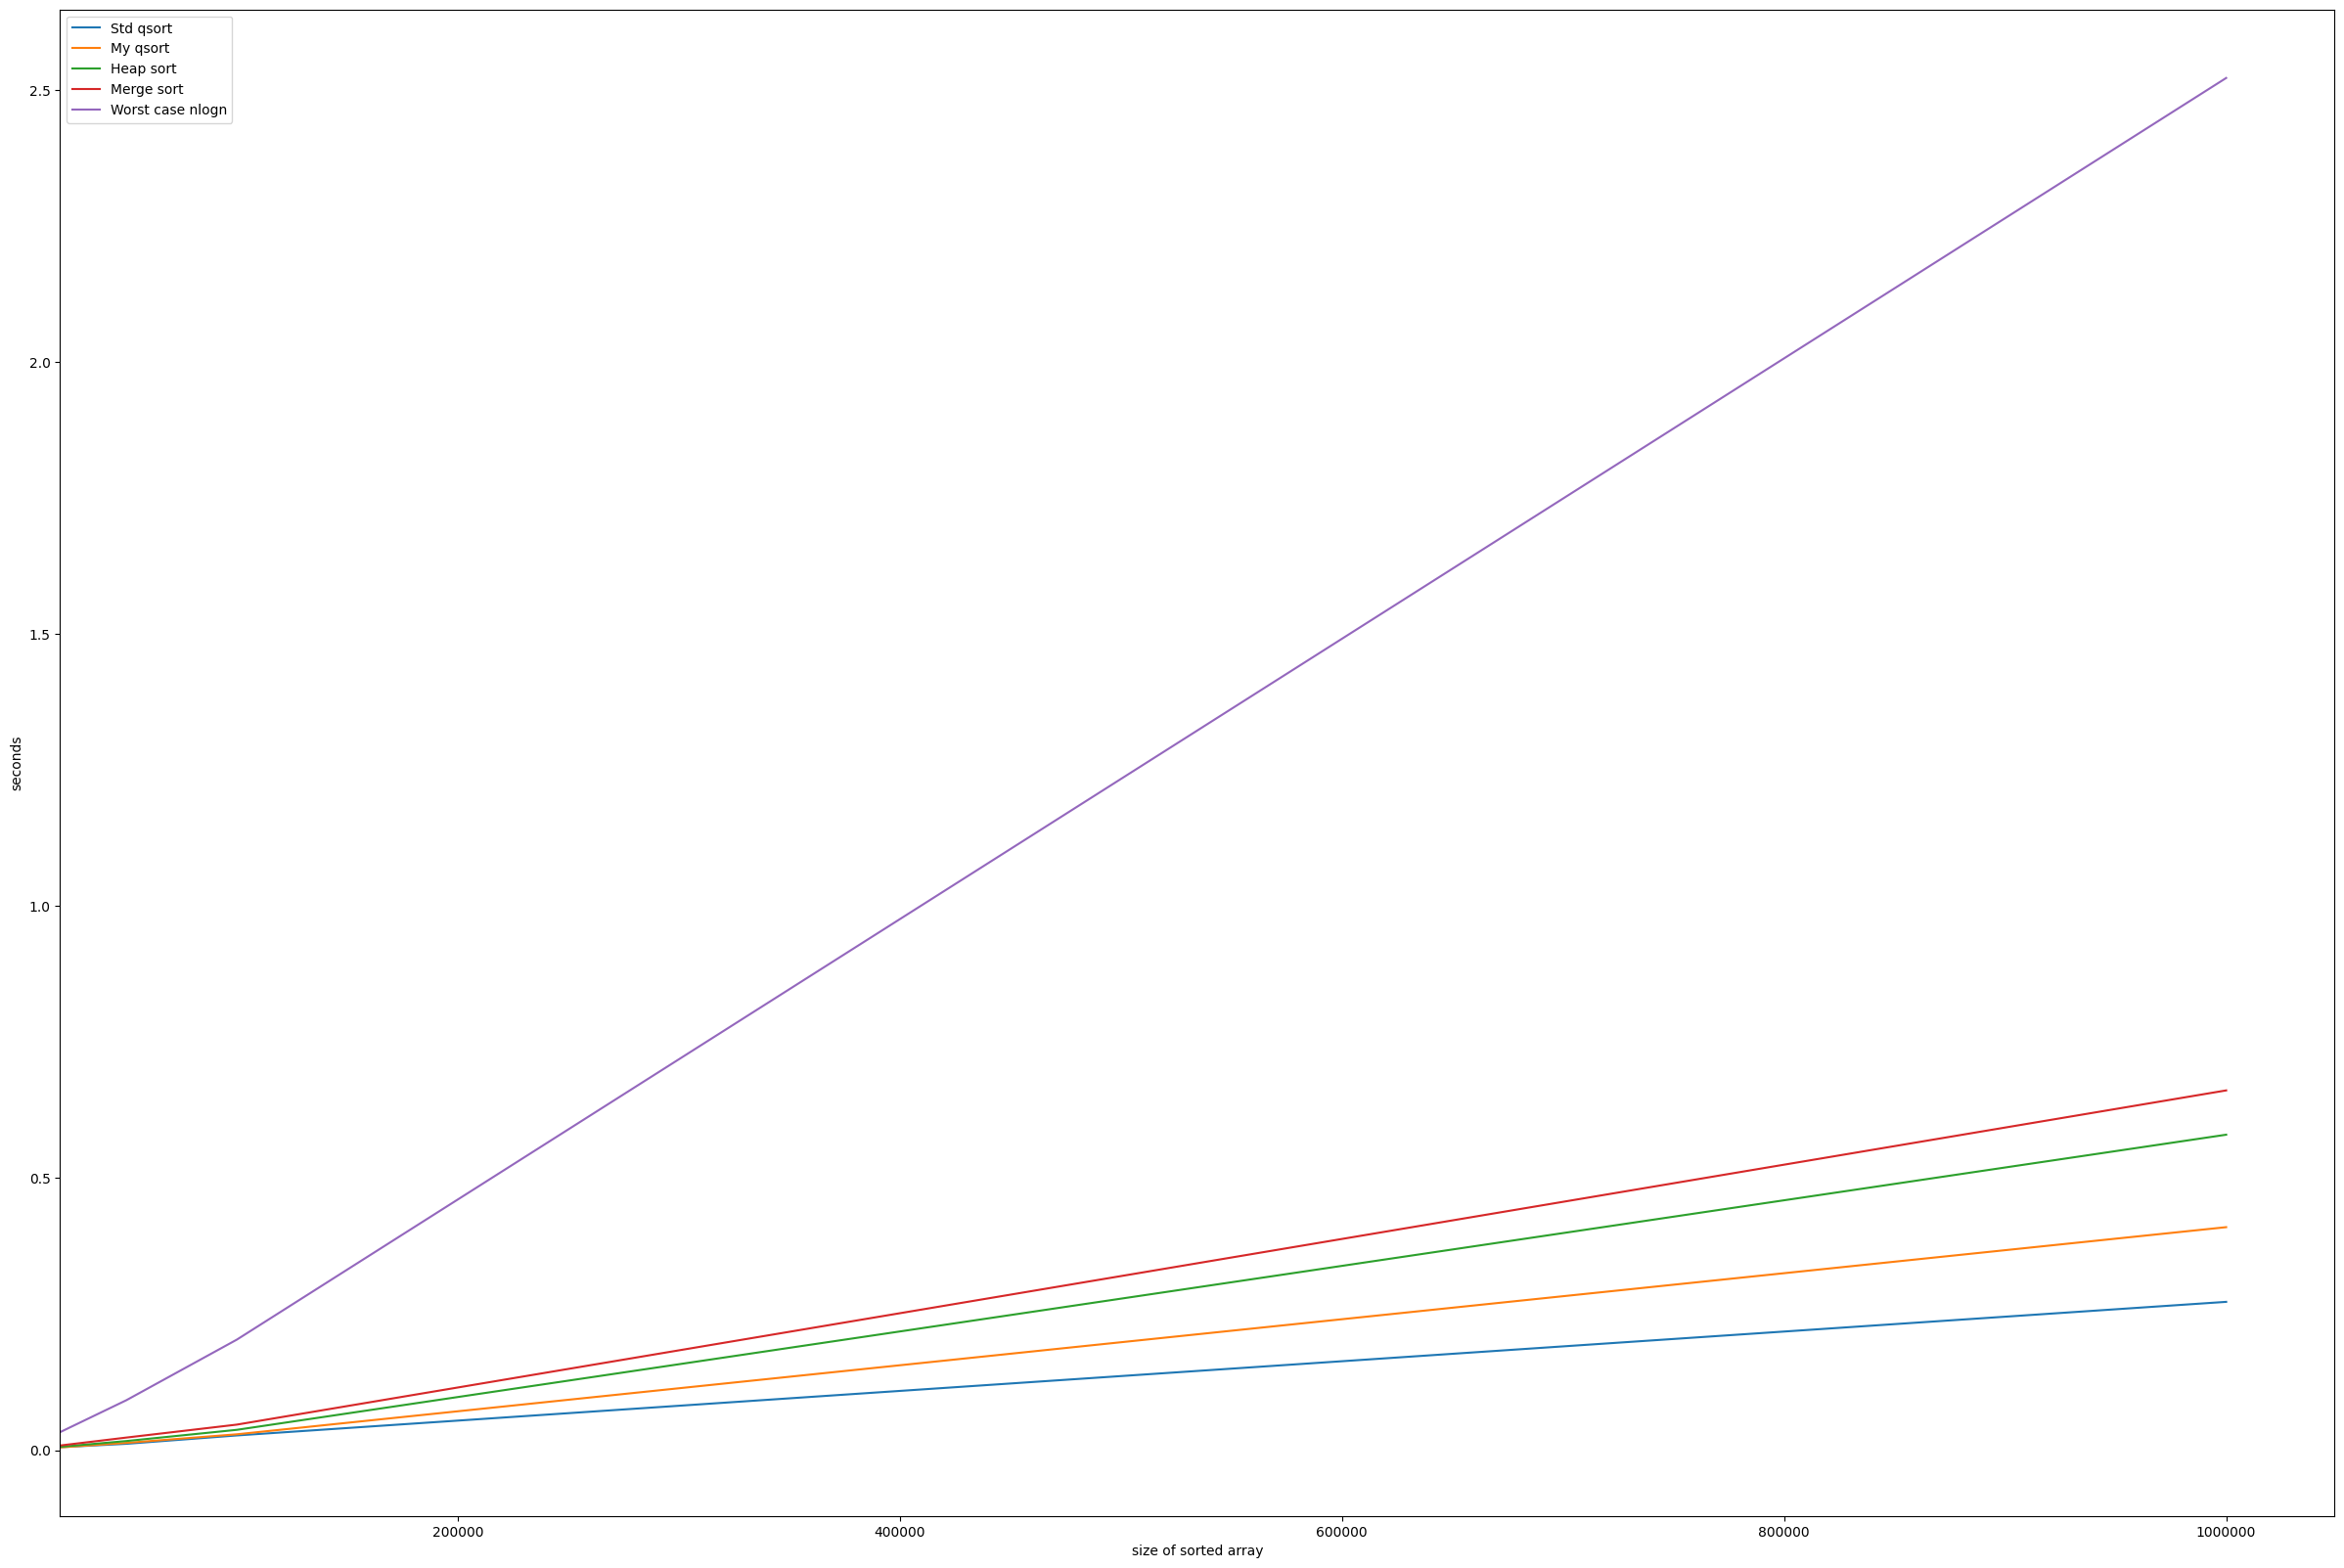

In [12]:
plt.figure(figsize=(30, 20))

for i in df2.tail(4).columns:
    plt.plot(df2.tail(4).index, df2.tail(4)[i], label=i)
plt.legend()
print(df2.index[-4], df2.index[-1])
plt.xlim(df2.index[-4]), (df2.index[-1])
plt.ticklabel_format(style = 'plain')
plt.ylabel('seconds')
plt.xlabel('size of sorted array')

In [13]:
csv_path3 = '/content/drive/MyDrive/sort_data/Fast-sorts/Fast-sorts-worst.csv'

In [14]:
df3 = pd.read_csv(csv_path3, index_col='n\\f_sort')
df3

Std qsort  My qsort  Heap sort  Merge sort  Worst case nlogn
n\f_sort                                                              
19         0.000003  0.000002   0.000001    0.000006          0.000002
101        0.000008  0.000023   0.000013    0.000027          0.000002
509        0.000002  0.000503   0.000078    0.000167          0.000586
2003       0.000137  0.008772   0.000428    0.000751          0.002549
10007      0.001137  0.158340   0.002585    0.004101          0.012786
20011      0.002750  0.715741   0.000001    0.006832          0.000002
50021      0.000001  4.646760   0.014271    0.000002          0.000002

Text(0.5, 0, 'size of sorted array')

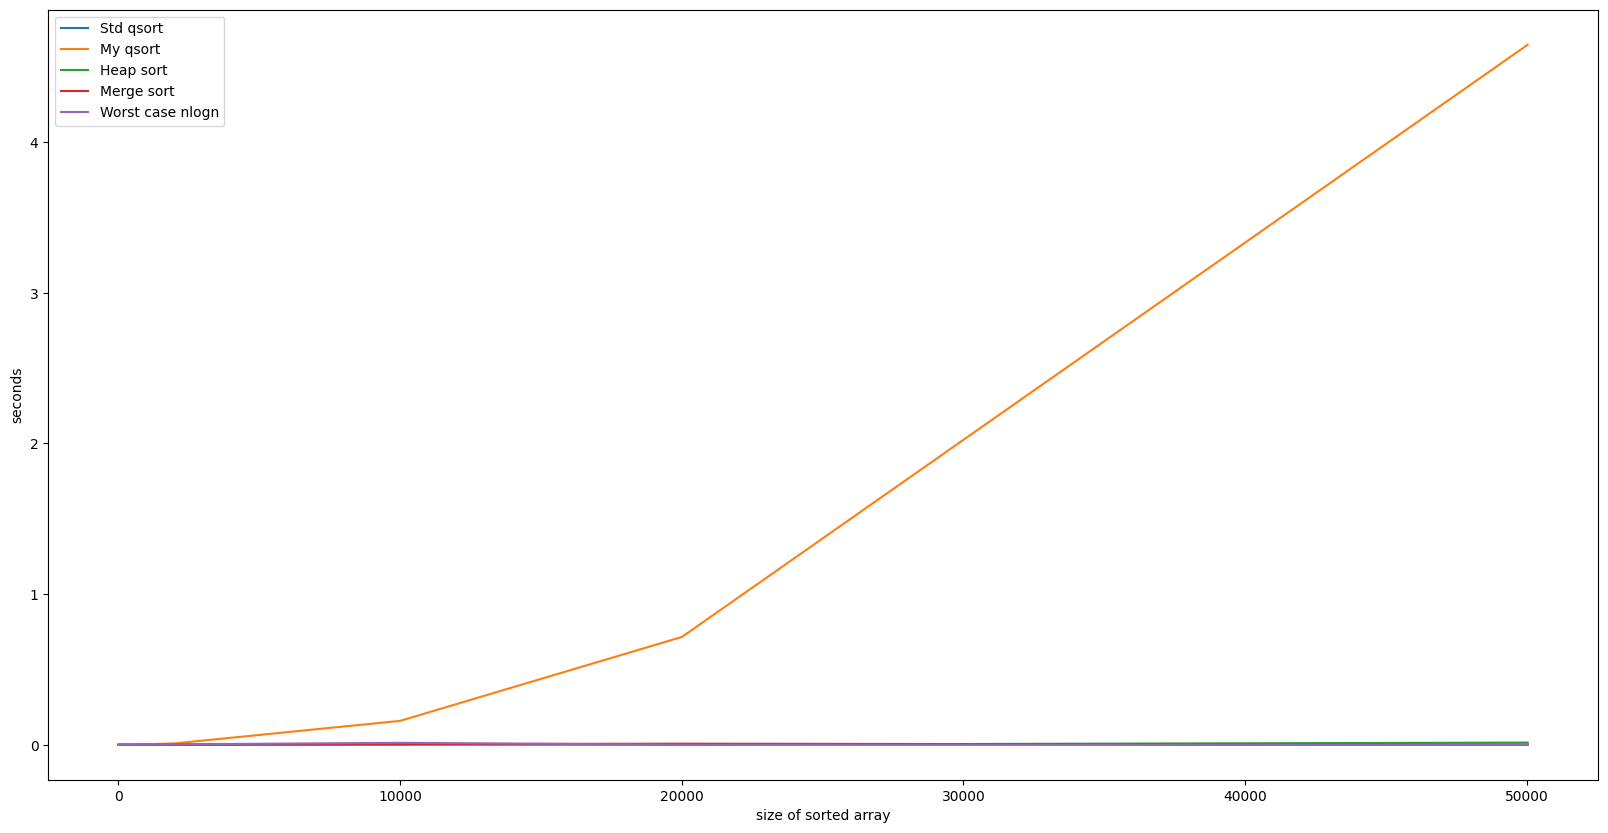

In [15]:
plt.figure(figsize=(20, 10))

for i in df3.columns:
    plt.plot(df3.index, df3[i], label=i)
plt.legend()
plt.ticklabel_format(style = 'plain')
plt.ylabel('seconds')
plt.xlabel('size of sorted array')

In [22]:
csv_path4 = '/content/drive/MyDrive/sort_data/Fast-sorts/Fast-sorts-worst-merge.csv'

In [23]:
df4 = pd.read_csv(csv_path4, index_col='n\\f_sort')
df4

Std qsort  My qsort  Heap sort  Merge sort  Worst case nlogn
n\f_sort                                                              
19         0.000002  0.000002   0.000001    0.000006          0.000014
101        0.000007  0.000023   0.000012    0.000029          0.000093
509        0.000001  0.000631   0.000078    0.000170          0.000668
2003       0.000198  0.008411   0.000472    0.000703          0.002971
10007      0.001030  0.167134   0.002829    0.003944          0.016034
20011      0.003264  0.678144   0.000001    0.008239          0.029244
50021      0.000001  5.105320   0.015885    0.094411          0.000002

In [24]:
plt.figure(figsize=(20, 10))

for i in df4.columns:
    plt.plot(df4.index, df4[i], label=i)
plt.legend()
plt.ticklabel_format(style = 'plain')
plt.ylabel('seconds')
plt.xlabel('size of sorted array')

Text(0.5, 0, 'size of sorted array')